In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
x_data = pd.read_csv("bch.csv")
y_data = pd.read_csv("y-data.csv")
x_data.head()

,1.000000000000000000e+00,0.000000000000000000e+00,1.000000000000000000e+00.1,1.000000000000000000e+00.2,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,1.000000000000000000e+00.3,...,0.000000000000000000e+00.28,1.000000000000000000e+00.37,0.000000000000000000e+00.29,0.000000000000000000e+00.30,1.000000000000000000e+00.38,1.000000000000000000e+00.39,0.000000000000000000e+00.31,0.000000000000000000e+00.32,1.000000000000000000e+00.40,0.000000000000000000e+00.33
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
len(x_data.columns), y_data.loc[0, :].values

(75, array([1.]))

In [ ]:
x_data.shape, y_data.shape

((399, 75), (399, 1))

In [ ]:
X_data = x_data.iloc[:, :].values
X_data_conn = []
for i in range(len(X_data)):
  X_data_ext = [[x] for x in X_data[i]]
  X_data_conn.append(X_data_ext)
X_data_conn = np.array(X_data_conn)
X_data_conn.shape

(399, 75, 1)

In [ ]:
y_data.shape

(399, 1)

In [ ]:
inp_layer = keras.layers.Input(shape=(75,1))

#conv1-64, 3x1
x = keras.layers.Conv1D(filters=64, kernel_size=3)(inp_layer)
x_act = keras.layers.Activation(tf.nn.relu)(x)

#conv1-64, 3x1
x = keras.layers.Conv1D(filters=64, kernel_size=3)(x_act)
x_act = keras.layers.Activation(tf.nn.relu)(x)

#conv1-128, 3x1
x = keras.layers.Conv1D(filters=128, kernel_size=3)(x_act)
x_act = keras.layers.Activation(tf.nn.relu)(x)

#global average pooling
gap = keras.layers.GlobalAveragePooling1D()(x_act)

#dense
d1 = keras.layers.Dense(64, activation="relu")(gap)
d2 = keras.layers.Dense(64, activation="relu")(d1)
out_layer = keras.layers.Dense(1, activation="sigmoid")(d2)

model_test1 = keras.Model(inp_layer, out_layer)

model_test1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 75, 1)]           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 73, 64)            256       
                                                                 
 activation_6 (Activation)   (None, 73, 64)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 71, 64)            12352     
                                                                 
 activation_7 (Activation)   (None, 71, 64)            0         
                                                                 
 conv1d_8 (Conv1D)           (None, 69, 128)           24704     
                                                                 
 activation_8 (Activation)   (None, 69, 128)           0   

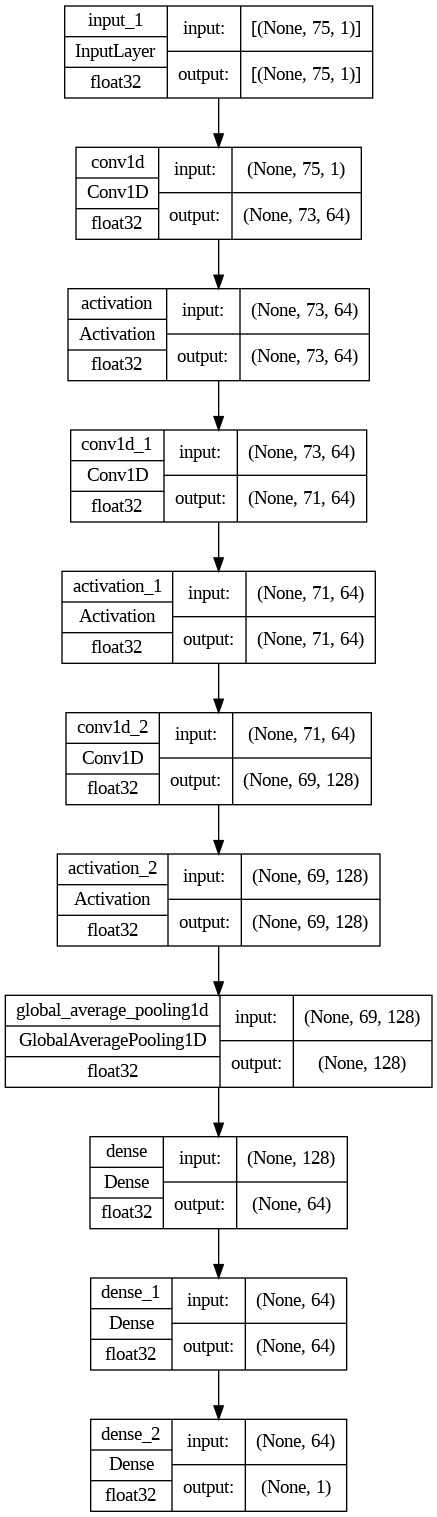

In [ ]:
from keras.utils import plot_model
plot_model(model_test1,show_shapes=True, show_dtype=True)

In [ ]:
x = []
y = []

for i in range(100):
  data1 = np.random.randint(0, 2, 150)
  data1 = [[x] for x in data1]
  data2 = np.random.randint(0, 2, 150)
  data2 = [[x] for x in data2]
  x.append(data1)
  y.append(0)
  x.append(data2)
  y.append(1)

In [ ]:
X = np.array(x)
Y = np.array(y)
X.shape, Y.shape

((200, 150, 1), (200,))

In [ ]:
model_test1.compile(
    optimizer="adam",
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model_test1.fit(X_data_conn, y_data, epochs=10, validation_split=0.3, batch_size=64)

Epoch 1/10
5/5 [==============================] - 0s 80ms/step - loss: 0.5821 - accuracy: 0.7384 - val_loss: 0.5149 - val_accuracy: 0.6583
Epoch 2/10
5/5 [==============================] - 0s 63ms/step - loss: 0.4803 - accuracy: 0.7240 - val_loss: 0.3993 - val_accuracy: 0.9333
Epoch 3/10
5/5 [==============================] - 0s 62ms/step - loss: 0.3526 - accuracy: 0.9785 - val_loss: 0.2468 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 56ms/step - loss: 0.1979 - accuracy: 0.9928 - val_loss: 0.1137 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 54ms/step - loss: 0.0836 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 54ms/step - loss: 0.0225 - accuracy: 0.9964 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 59ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 8/10
5/5 [===========

NameError: ignored

In [ ]:
import scipy.io as ioo
mat = ioo.loadmat("/content/turbo_dat.mat")
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Dec 19 15:41:07 2023',
 '__version__': '1.0',
 '__globals__': [],
 'None': MatlabOpaque([(b'simout', b'MCOS', b'timetable', array([[3707764736],
                      [         2],
                      [         1],
                      [         1],
                      [         1],
                      [         2]], dtype=uint32))                   ],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8)}

In [ ]:
con_list = [[element for element in upperElement] for upperElement in mat['__function_workspace__']]
con_list

[[0,
  1,
  73,
  77,
  0,
  0,
  0,
  0,
  14,
  0,
  0,
  0,
  224,
  43,
  43,
  0,
  6,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  4,
  0,
  5,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  77,
  67,
  79,
  83,
  0,
  0,
  0,
  0,
  14,
  0,
  0,
  0,
  152,
  43,
  43,
  0,
  6,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  17,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  4,
  0,
  77,
  67,
  79,
  83,
  1,
  0,
  0,
  0,
  13,
  0,
  0,
  0,
  70,
  105,
  108,
  101,
  87,
  114,
  97,
  112,
  112,
  101,
  114,
  95,
  95,
  0,
  0,
  0,
  14,
  0,
  0,
  0,
  88,
  43,
  43,
  0,
  6,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  8,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0